<a href="https://colab.research.google.com/github/suzanagomes/Data-Vikings---WebScraping/blob/main/Aula_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  👩‍💻 Web Scraping e Word Cloud: Utilizando a biblioteca Beautiful Soup 

Importando as bibliotecas

In [1]:
# Libs
#!pip intall WordCloud
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
import requests

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Testando e entendendo conceitos

In [2]:
# Link do site
Site = 'https://news.google.com/search?for=americanas&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

# Requisição
Pagina = requests.get( Site )

In [3]:
Coleta = BeautifulSoup( Pagina.text, 'html.parser')

In [4]:
# Buscar
Coleta.title.string

'Google Notícias - Pesquisar'

In [5]:
Coleta.title.name

'title'

In [6]:
Coleta.find( class_='cp7Yvc').string

'Americanas revisa lista de credores e dívida aumenta'

In [7]:
Coleta.find( class_='cp7Yvc').name

'div'

In [8]:
len( Coleta.find_all('span') )

472

#Criando a Solução de Web Scraping

### Busca de informações sobre o CHAT GPT

In [29]:
# Solução
def Buscar_Empresas(ticket):
  
  # Criando a URK
  Url = f'https://news.google.com/search?for={ticket}&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

  # Resposta
  Resposta = requests.get( Url )

  # Codigo --> SOAP
  Codigo_HTML = Resposta.text

  # Converter SOAP
  Objeto_Soup = BeautifulSoup( Codigo_HTML, 'html.parser')

  return Objeto_Soup

In [30]:
# Todas as informações
Dados = Buscar_Empresas('ChatGPT')

len( Dados )

# Buscando os titulos
Elementos = Dados.find_all('h3')

In [31]:
# Buscando os textos
Noticias = [ Texto.get_text() for Texto in Elementos ]
print('Noticias')
print( len(Noticias) )

Noticias
96


In [32]:
print('***' * 7 )
print('*** Notícias localizadas ***')
print('***' * 7 )

for Numero, Loop in enumerate( Noticias[0:5] ):
  print('--' * 10)
  print( Loop )

*********************
*** Notícias localizadas ***
*********************
--------------------
ChatGPT no Bing diz ser senciente e avacalha concorrente
--------------------
Vilão ou mocinho: por que o ChatGPT ameaça tantas profissões?
--------------------
ChatGPT: as soluções da inteligência artificial contra o golpismo, o garimpo ilegal e as fake news
--------------------
ChatGPT pago chega ao Brasil por R$ 104 ao mês
--------------------
ChatGPT: versão paga chega ao Brasil por R$ 104 por mês; veja benefícios


In [33]:
Concatenar = ''

for Loop in Noticias:
  Quebra = Loop.split()

  for Palavra in Quebra:
    Concatenar = Concatenar + ' ' + Palavra

In [34]:
Concatenar

' ChatGPT no Bing diz ser senciente e avacalha concorrente Vilão ou mocinho: por que o ChatGPT ameaça tantas profissões? ChatGPT: as soluções da inteligência artificial contra o golpismo, o garimpo ilegal e as fake news ChatGPT pago chega ao Brasil por R$ 104 ao mês ChatGPT: versão paga chega ao Brasil por R$ 104 por mês; veja benefícios OpenAI lança assinatura de ChatGPT Plus no Brasil por R$ 105 ChatGPT acha que Jair Bolsonaro ainda é presidente do Brasil; entenda o motivo ChatGPT simula discursos de políticos; leia ChatGPT acha que Bolsonaro ainda é presidente do Brasil; veja o motivo ChatGPT abala confiança da industria tech chinesa Bill Gates: “ChatGPT vai mudar o mundo” ChatGPT do Bing revela segredos internos se você perguntar com jeitinho ChatGPT: veja como a inteligência artificial é capaz de ajudar no trabalho ChatGPT brasileiro? Criado há quase 20 anos, Robô Ed já foi sensação na internet e responde perguntas sobre vários assuntos ChatGPT Plus é oficialmente lançado no Brasi

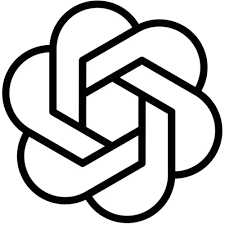

In [35]:
from PIL import Image
Image.open('chatgpt.png')

In [36]:
Mascara = np.array( Image.open('chatgpt.png') )
Mascara[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

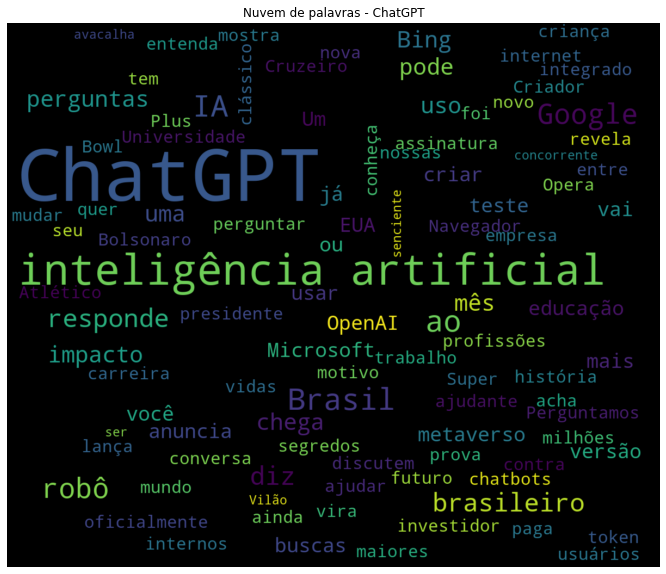

In [37]:
# Criando a nuvem
Nuvem_Palavras = WordCloud(
  width= 1200,
  height= 1000,
  max_words=100,
  min_font_size=10,
  # Remover palavras
  stopwords=[ 'o', 'de', 'da', 'em', 'que', 'e', 'a', 'das', 'não', 'dos', 'Veja', 'sobre',  'é', 'na', 'com', 'Por', 'as', 'os', 'como', 'do', 'para', 'no', 'à', 'R', 'se']
  ).generate( Concatenar )
 
Figura, Eixo = plt.subplots( figsize=(12, 10) )
plt.title('Nuvem de palavras - ChatGPT')
Eixo.imshow( Nuvem_Palavras, interpolation='bilinear' )
Eixo.set_axis_off()
plt.savefig('Analise_Nuvem_Palavras.png')

### Busca de informações sobre as Americanas

In [19]:
# Solução
def Buscar_Empresas(ticket):
  
  # Criando a URK
  Url = f'https://news.google.com/search?for={ticket}&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

  # Resposta
  Resposta = requests.get( Url )

  # Codigo --> SOAP
  Codigo_HTML = Resposta.text

  # Converter SOAP
  Objeto_Soup = BeautifulSoup( Codigo_HTML, 'html.parser')

  return Objeto_Soup

In [20]:
# Todas as informações
Dados = Buscar_Empresas('Americanas')

len( Dados )

# Buscando os titulos
Elementos = Dados.find_all('h3')

In [21]:
# Buscando os textos
Noticias = [ Texto.get_text() for Texto in Elementos ]
print('Noticias')
print( len(Noticias) )

Noticias
87


In [22]:
print('***' * 7 )
print('*** Notícias localizadas ***')
print('***' * 7 )

for Numero, Loop in enumerate( Noticias[0:5] ):
  print('--' * 10)
  print( Loop )

*********************
*** Notícias localizadas ***
*********************
--------------------
Americanas: dívida de quase R$ 1 bi coloca em risco operação de micros, pequenas e médias empresas
--------------------
Além das Americanas: veja outras 5 empresas que revelaram rombos nas contas
--------------------
Jorge Paulo Lemann curte Miami em meio à hecatombe da Americanas
--------------------
Onde estão os ex-CEOs da Americanas, um mês depois do escândalo de R$ 20 bilhões?
--------------------
Bancos 'fecham portas e janelas' às empresas dos caloteiros da Americanas


In [23]:
Concatenar = ''

for Loop in Noticias:
  Quebra = Loop.split()

  for Palavra in Quebra:
    Concatenar = Concatenar + ' ' + Palavra

In [24]:
Concatenar

' Americanas: dívida de quase R$ 1 bi coloca em risco operação de micros, pequenas e médias empresas Além das Americanas: veja outras 5 empresas que revelaram rombos nas contas Jorge Paulo Lemann curte Miami em meio à hecatombe da Americanas Onde estão os ex-CEOs da Americanas, um mês depois do escândalo de R$ 20 bilhões? Bancos \'fecham portas e janelas\' às empresas dos caloteiros da Americanas Americanas: o principal impasse no acordo entre acionistas e credores Juntos somos Americanas Caçada da Anatel ao \'gatonet\' coloca Magazine Luiza, Americanas, Amazon e Casas Bahia na mira Efeito (destruidor) da Americanas elevou taxas das debêntures: é hora de aproveitar a “oportunidade”? Morgan Stanley reduz participação na Americanas Por Investing.com Americanas devem negociar, mas podem demitir, suspender vagas ou cortar salários "Vamos capturar o vácuo deixado pela Americanas", diz CEO da Via Vale a pena comprar ações das Americanas? O que o caso Americanas ensina sobre crédito privado a

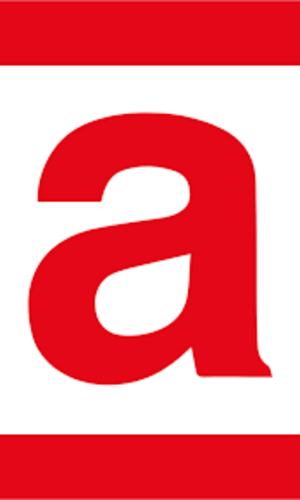

In [25]:
from PIL import Image
Image.open('americanas.png')

In [26]:
Mascara = np.array( Image.open('americanas.png') )
Mascara[0:10]

array([[[233,  74,  83],
        [233,  74,  83],
        [233,  74,  83],
        ...,
        [233,  74,  83],
        [233,  74,  83],
        [233,  74,  83]],

       [[230,  47,  59],
        [230,  47,  59],
        [230,  47,  59],
        ...,
        [230,  47,  59],
        [230,  47,  59],
        [230,  47,  59]],

       [[227,   6,  22],
        [227,   6,  22],
        [227,   6,  22],
        ...,
        [227,   6,  22],
        [227,   6,  22],
        [227,   6,  22]],

       ...,

       [[227,   7,  24],
        [227,   7,  24],
        [227,   7,  24],
        ...,
        [227,   7,  24],
        [227,   7,  24],
        [227,   7,  24]],

       [[227,   7,  24],
        [227,   7,  24],
        [227,   7,  24],
        ...,
        [227,   7,  24],
        [227,   7,  24],
        [227,   7,  24]],

       [[227,   7,  24],
        [227,   7,  24],
        [227,   7,  24],
        ...,
        [227,   7,  24],
        [227,   7,  24],
        [227,   7,  24]]

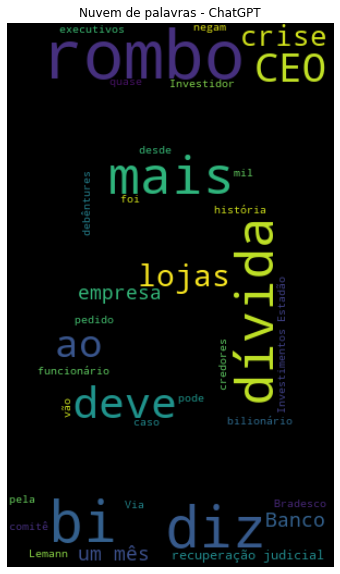

In [27]:
# Criando a nuvem
Nuvem_Palavras = WordCloud(
  width= 1200,
  height= 1000,
  max_words=100,
  mask=Mascara,
  min_font_size=10,
  # Remover palavras
  stopwords=['Americanas', 'o', 'de', 'da', 'em', 'que', 'e', 'a', 'das', 'não', 'dos', 'Veja', 'sobre', 'AMER3', 'é', 'na', 'com', 'Por', 'as', 'os', 'como', 'do', 'para', 'no', 'à', 'R', 'se']
  ).generate( Concatenar )
 
Figura, Eixo = plt.subplots( figsize=(12, 10) )
plt.title('Nuvem de palavras - ChatGPT')
Eixo.imshow( Nuvem_Palavras, interpolation='bilinear' )
Eixo.set_axis_off()
plt.savefig('Analise_Nuvem_Palavras.png')